# CS5228 Assignment 1 - Solutions

<font color='red'>

Note on Solutions: The solutions below are just one possible set of answers - in general, other valid solutions may also exist, and as long as we find your answer reasonable and justified, it would be graded as correct. 
    
</font>

**Important:** 
* Remember to rename and save this Jupyter notebook as **A1_YourName_YourNUSNETID.ipynb** (e.g., **A1_BobSmith_e12345678.ipynb**) before submission!
* Submission deadline is 5 March 2023 (Sunday 11.59pm). You can submit by uploading them to the Canvas submission folder. You have 4 late days which can be used for either assignment, that extend the deadline by 24 hours each. No need to send any emails to use them, just submit late and they will be counted automatically. 

## Overview
The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion.

* **Q1: Data Cleaning & Exploratory Data Analysis (EDA) (30 Points)**
    * 1 (a) Removing "Dirty" Records (6 Points)
    * 1 (b) Handling Missing (NaN) Values (6 Points)
    * 1 (c) Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)
    * 1 (d) Handling of Categorical Attributes (4 Points)
    * 1 (e) Basic Facts about a Real-World Dataset (8 Points)
* **Q2: DBSCAN (10 Points)**
    * 2 (a) Running DBSCAN and Visualization (3 Points)
    * 2 (b) Effects of Data Manipulation on DBSCAN Results (3 Points)
    * 2 (c) Identifying Noise/Outliers with Clustering beyond DBSCAN (4 Points)
* **Q3: Clustering Algorithms (18 Points)**
    * 3 (a) Questions about K-Means (12 Points)
    * 3 (b) Interpreting Dendrograms (6 Points)
* **Q4: Association Rule Mining (12 Points)**
    * 4 (a) Compare the Runs A-D and Discuss your Observations! (4 Points) 
    * 4 (b) Compare the Runs A-D and discuss the results for building a recommendation engine! (4 Points)
    * 4 (c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points) 

## Setting up the Notebook

In [26]:
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans
from efficient_apriori import apriori
from src.utils import support, confidence, show_top_rules

np.set_printoptions(precision=2)

----------------

# Q1: Data Cleaning & Explorative Data Analysis (EDA) (30 Points)

For the following tasks, we consider a dataset containing information 20,000 past resale transactions of condo flats. Each record (i.e., data samples) consists of 12 attributes. The following **data description** list all attributes together with a brief description of each attribute's data type / domain:

* **transaction_id**: Unique ID of the resale transactions; an 8-digit integer number uniquely assigned to each transaction.
* **url**: Unique link to a website documenting this transaction as a string value.
* **name**: The name of the condo as a string value (e.g., "estella gardens", "eedon green").
* **type**: The type of condo as string value (e.g., "condominium", "apartment").
* **postal_district**: The postal district the condo is located in as integer value; Singapore has 28 postal districts: 1, 2, ..., 28 (cf. [here](https://www.ura.gov.sg/realEstateIIWeb/resources/misc/list_of_postal_districts.htm)).
* **subzone**: The subzone the condo is located in as a string value.
* **planning_area**: The planning area the condo is located in as a string value.
* **region**: The region the condo is located in as a string value.
* **date_of_sale**: The date (month & year) of the transaction as a string value (e.g., "mar-19", "oct-20").
* **area_sqft**: The size of the condo flat in square feet as a positive integer value.
* **floor_level**: The range of floors in which the flat is located in the condo as string value (e.g., "06 to 10", "11 to 15").
* **eco_category**: The eco category of the condo as a single-character string value (e.g., "A", "B", "C", "D").
* **price**: Resale price of the condo flat in Singapore Dollar as an integer value.

Additional information: Singapore has 55 planning areas; each split into multiple subzones (if interested, you can check the corresponding [Wikipedia article](https://en.wikipedia.org/wiki/List_of_places_in_Singapore)).

**Important:** In each of the following subtasks we use a slightly different version of the dataset. This allows you to focus on the specific aspects of data cleaning / data preprocessing addresses in the respective subtask.

### 1 (a) Removing "Dirty" Records (6 Points)

We argued in the lecture that almost all real-world datasets contain some form of noise that might negatively affect any applied data analysis. The very first -- and in some sense -- easiest way to identify noise is to check if all data confirms with the data description. The following code cell shows a snippet of the dataset which you will be looking at in this subtask.

In [4]:
df_condo_dirty = pd.read_csv('data/a1-condo-resale-dirty.csv')

df_condo_dirty.head()

,transaction_id,name,street,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,price
0,82953057,treasure at tampines,tampines lane,condominium,18,tampines east,tampines,jul-19,818,06 to 10,1024000
1,17139360,parc central residences,tampines street 86,executive condominium,18,tampines west,tampines,apr-21,990,11 to 15,1187000
2,22288515,martina mansions,bukit timah road,apartment,10,nassim,tanglin,jan-20,1259,01 to 05,2300000
3,80737365,the pier at robertson,mohamed sultan road,apartment,9,robertson quay,singapore river,jun-19,1044,06 to 10,2400000
4,83154310,rivercove residences,anchorvale lane,executive condominium,19,anchorvale,sengkang,oct-18,1184,16 to 20,1239100


If you check the dataset against its description, you will notice that many records are "dirty". **We define a record as "dirty" if it does not adhere to the given data description (see above)**. Such records are not guaranteed to be valid and should therefore not be used for any analysis.

**Identify 2 causes of "dirty" records and remove all corresponding records from the dataset!** Please provide your answer in the markdown cell below. Additional (simplifying) guidelines:

* Ignore missing (`NaN`) values -- that is, a record containing one or more missing values does not make this record dirty. We look at missing values in a subsequent task.
* Ignore the correctness of string values -- we do not expect you to check, e.g., if a street name contains a typo or a planning area is indeed one of the existing 55 planning areas in Singapore

**Your Answer:**

<font color='red'>

* Invalid transaction ids (ids other than 8-digit integers)
* Invalid postal districts (some records have a district of 0)
* Invalid area sizes (some records have a negative size); `< 0` or `<= 0` is both fine, doesn't change the result
* Removal of duplicates (ids must be unique according to data description)
    
</font>

Use the code cell below to actually implement your steps for removing the "dirty" records. The results should back up your answer above.

**Important:** Avoid using loops in the parts of the code you have to complete -- `pandas` is really powerful and should be your best friend here. If you use loops but the results are correct, there will be some minor deduction of points. But note that it's of course better to have a working solution using loops than having no solution at all.

In [5]:
# We first create a copy of the dataset and use this one to clean the data.
df_cleaned = df_condo_dirty.copy()

#########################################################################################
### Your code starts here ###############################################################

print(df_cleaned.shape)

# Remove all transaction with invalid transaction id (only 8 digits)
df_cleaned = df_cleaned[df_cleaned.transaction_id.str.match('^\d{8}$')]

print(df_cleaned.shape)

# Remove all transactions with invalid area size
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned.area_sqft <= 0].index)

# Remove all transactions with invalid postal district
df_cleaned = df_cleaned.drop(df_cleaned[(df_cleaned.postal_district < 1) | (df_cleaned.postal_district > 28)].index)

# Drop duplicates (w.r.t. transaction id)
df_cleaned = df_cleaned.drop_duplicates(subset=['transaction_id'])

### Your code ends here #################################################################
#########################################################################################

print('After cleaning, there are now {} records.'.format(df_cleaned.shape[0]))

(20000, 11)
(19382, 11)
After cleaning, there are now 17308 records.


**Important:** We do not provide an expected output regarding the number of records after the cleaning step as there is some wiggle room regarding the performed steps which would affect this result. As such, even if two solutions are correct, they do not necessarily yield the same number of records.

### 1 (b) Handling Missing (NaN) Values (6 Points)

Many to most traditional data mining algorithms do not like missing (NaN) values and will throw an error if missing values are present. We therefore have to address missing values and get rid of them. On the other hand, we want to preserve as much of our dataset as possible, so we need to be smart about that. In this subtask, you are provided with a version of our condo resale dataset that contains missing values but is otherwise clean -- so it is all about the `NaN` values here.

Let's load the dataset and have a quick look -- the attributes are the same as before:

In [6]:
df_condo_nan = pd.read_csv('data/a1-condo-resale-nan.csv')

df_condo_nan.head()

,transaction_id,url,name,street,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,95103981,http://condo-sg.com/alex-residences-3570,alex residences,alexandra view,apartment,3,redhill,bukit merah,oct-21,883,01 to 05,A,1595880.0
1,69374014,http://condo-sg.com/the-rivervale-4160,the rivervale,rivervale link,executive condominium,19,rivervale,sengkang,jul-17,1313,06 to 10,A,900000.0
2,54377409,http://condo-sg.com/parc-palais-5143,parc palais,hume avenue,condominium,21,hillview,bukit batok,sep-21,1389,01 to 05,A,1810000.0
3,64749050,NaN,hedges park condominium,flora drive,condominium,17,flora drive,pasir ris,may-19,484,01 to 05,A,565000.0
4,18136469,NaN,kingsford waterbay,upper serangoon view,apartment,19,kangkar,hougang,may-21,678,06 to 10,A,875000.0


Since your decision for handling `NaN` values might depend in the data mining task, assume in the following that you want to use this dataset to **create a regression model to predict the resale price** from the attributes of a transaction. Of course, there will be no need to actually create such a model here :).

**Identify all `NaN` values in the dataset and handle them appropriately!** After this preprocessing, the resulting dataset should no longer contain any `NaN` values. Additional (simplifying) hints or guidelines:

* You can use the `.info()` function of a pandas dataset to get info about its `NaN` values.
* You do not need to consider external knowledge (i.e., information coming from outside this dataset), or sophisticated solutions such as [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). These can be very useful in practice (and maybe for your project), but their application requires certain assumptions to hold for good results. This is beyond the scope of this assignment.
* Remove column `url`; one can argue that this is just a label and has no information for any analysis
* Remove all records where `price` or `area_sqft` is `NaN`; these attributes are vey important for creating the model and there's no obvious way to reliably derive it
* Derive missing `planning_area` values from subzone values; there's a clear mapping from a subzone to the corresponding planning area

**Your Answer:**

Use the code cell below to actually implement your steps for handling `NaN` values. The results should back up your answer above.

**Important:** Avoid using loops in the parts of the code you have to complete -- pandas is really powerful and should be your best friend here. If you use loops but the results are correct, there will be some minor deduction of points.

In [7]:
# We first create a copy of the dataset and use this one to clean the data.
df_no_nan = df_condo_nan.copy()

#########################################################################################
### Your code starts here ###############################################################

# How to find NaN values
#df_no_nan.info()

# Drop records with NA values for "price" (required for creating model)
df_no_nan = df_no_nan.dropna(subset=['price'])

# Drop records with NA values for "area_sqft" (too important to be dropped; too difficult to reliably estimate/derive)
df_no_nan = df_no_nan.dropna(subset=['area_sqft'])

# Drop column url (not important for any analysis)
df_no_nan = df_no_nan.drop(['url'], axis = 1)

# Map from subzone back to missing planning areas
df_tmp = df_no_nan.dropna(subset=['planning_area']) # Need to avoid an accidental mapping to NaN
zone2area = dict (zip(df_tmp.subzone, df_tmp.planning_area)) # Create dictionary subzone->planning_area
df_no_nan.planning_area = df_no_nan.subzone.map(zone2area) # Update planning area based on mapping

### Your code ends here #################################################################
#########################################################################################

print('After handling missing values, there are now {} records.'.format(df_no_nan.shape[0]))
print('Number of records with an NaN for any attribute: {}'.format((df_no_nan.isna().sum(axis=1) > 0).sum()))

After handling missing values, there are now 19033 records.
Number of records with an NaN for any attribute: 0


**Important:** We do not provide an expected output regarding the number of records after this preprocessing step as there is some wiggle room regarding the performed steps which would affect this result. However, the number of records with `NaN` values should be 0.

### 1 (c) Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)

Identifying "dirty" records and missing data are two very fundamental and generally rather systematic steps as part of data cleaning / data preprocessing. However, as we saw in the lecture using some examples, there are many other issues with the dataset that can be considered noise and thus potentially negatively affecting any data analysis. So the more noise we can remove, the more likely we can expect meaning analysis results.

For this subtask, we use a version of our condo resale dataset **with no "dirty" records or missing data**! Let's have a look:

In [8]:
df_condo_others = pd.read_csv('data/a1-condo-resale-others.csv')

df_condo_others.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,72606080.0,https://condo-sg.com/amber-park-4904,amber park,condominium,15,marine parade,marine parade,apr-21,678,16 to 20,A,1679130
1,62765491.0,https://condo-sg.com/braddell-view-5318,braddell view,apartment,20,toa payoh west,Toa Payoh,oct-20,1701,01 to 05,A,1255000
2,65584694.0,https://condo-sg.com/tangerine-grove-2635,tangerine grove,condominium,19,tai seng,hougang,nov-18,947,01 to 05,A,1130000
3,16401608.0,https://condo-sg.com/goldenhill-park-condomini...,goldenhill park condominium,condominium,20,lorong chuan,serangoon,mar-21,1313,01 to 05,A,2000000
4,53975895.0,https://condo-sg.com/kingsford-waterbay-1085,kingsford waterbay,apartment,19,kangkar,hougang,may-17,883,06 to 10,A,1030000


**Your boss points out the following data quality issues; please explain what the issues are and how you would deal with them:** Please provide your answer in the markdown cell below list necessary steps with a justification for your decision. 

* Outliers in `area_sqft`;
* Inconsistent naming in `planning_area`;

Additional (simplifying) guidelines:
* You should still assume that we want to use this dataset to create a model for predicting the resale price of a flat based on its attributes. The choice of data mining task can affect your decision for what cleaning / preprocessing steps to apply.
* There is no need to consider external knowledge. For example, you do not have to check if a value for `subzone` is indeed an existing subzone of Singapore.
* There is no need for you to implement any processing steps! Most important are your justifications for your decisions.

**Your Answer:**


<font color='red'>

* Remove Outliers: `area_sqft = 1` (area size way too small to be realistic)
* Normalize all planning areas to lowercase (or otherwise normalize the strings)

</font>

### 1 (d) Handling Categorical Attributes (4 Points)

Many to most data mining algorithms require all input features / attributes to be numerical. Our dataset with transactions resales of condo flats contains attributes that are not all numerical. As such, assuming we indeed want to utilize them, we need to convert those attributes into numerical ones. Regarding encoding techniques, we covered [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in the lecture. For variables with too many categories (e.g. >30) to be suitable for one-hot encoding, a common alternative is [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html), which replaces each category with a numeric value (roughly, the average value of the target variable for that particular category).

Some common choices for how to handle a categorical attribute include
* **Drop**: to drop a variable if it is not likely to be useful for modelling
* **Ordinal**: treat it as an ordinal variable
* **One-Hot Encoding**: encode each of its categories into a binary attribute
* **Target Encoding**: encoder the entire variable into a single numerical attribute

**For each of the 4 above choices, select *1* variable that you believe is suitable to be handled using that choice, and justify.**

There is no single correct answer for this task; it's your justification that matters. Again, assume that we want to create a regression model to predict the resale price of a flat based on the other features.

**Your Answer:**

<font color='red'>

* Drop `transaction_id`, `url`, `eco_category` (not useful for regression model)
* OK-ish to drop: `subzone`, `postal_district` (too many values, kind of covered by planning area)
* Ordinal-Enconding: `floor_level`
* One-Hot encoding: `type` (not that many different value)
* Target encoding: `name`, `planning area` (too many unique values for one-hot, but it's arguably an important attribute)
</font>

### 1(e) Basic Facts about a Real-World Dataset (8 Points)

The following tasks are about getting basic insights into the Condo Resale Prices dataset. As the data preprocessing steps you choose to perform might affect the results of this task, we will use a modified version here. Note that this version contains 50,000 listing of condo resale transactions and does **not** contain any "dirty" records. This is to ensure that everyone uses the same data. This helps marking your solutions as we know which results to expect.

In [51]:
df_condo_facts = pd.read_csv('data/a1-condo-resale-facts.csv')

df_condo_facts.head()

,transaction_id,url,name,type,postal_district,subzone,planning_area,date_of_sale,area_sqft,floor_level,eco_category,price
0,13685562,https://condo-sg.com/the-tapestry-9447,the tapestry,condominium,18,tampines west,tampines,apr-18,700,01 to 05,A,931500
1,53321107,https://condo-sg.com/the-interlace-4916,the interlace,condominium,4,depot road,bukit merah,jun-17,1044,11 to 15,A,1200000
2,10676043,https://condo-sg.com/d'leedon-5888,d'leedon,condominium,10,farrer court,bukit timah,aug-21,635,11 to 15,A,1100000
3,88341877,https://condo-sg.com/mulberry-tree-4753,mulberry tree,apartment,11,moulmein,novena,may-18,667,01 to 05,A,1100000
4,69569828,https://condo-sg.com/ue-square-3203,ue square,apartment,9,robertson quay,singapore river,apr-18,1206,01 to 05,A,1950000


Please complete the table below by answering the given questions. Use the code cell below the table to actually implement your steps that enabled you to answer the questions. There is no need for a fancy layout for any print statement; it's only important that the result is clear.

**Your Answer:**

This is a markdown cell. Please fill in your answers for (1)-(6). Answers (1)-(4) are worth 1 Point each; Answer (5)-(6) are worth 2 Points.

| No. | Question                                                                                                   | Answer       |
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| (1)  | What is the date (month & year) of the first transactions? | <font color='red'>2016-12 (2018-04 also acceptable, interpreting 'first' as first row)</font> |
| (2)  | For each `type`, how many transactions are in the dataset?  | <font color='red'>apartment (8,038); condominium (9,688); executive condominium (2255); strata detached (2); strata semi-detached (3); strata terrace (14)</font> |
| (3)  | What is the planning area with the most transactions? List the name of the planning area and the number of transactions!  | <font color='red'>bedok: 1,307</font> |
| (4)  | What is the correlation between the resale *price* and *area_sqft*? | <font color='red'>0.74</font> |
| (5)  | Which transaction in postal district 11 had the highest price-to-area ratio (i.e., the highest price per square foot)? List the name of the condo and the price per square foot (rounded to 2 decimals)| <font color='red'>pullman residences newton: 3,083.96</font> |
| (6)  | What is the number of transactions where the flat/apartment was between the 51st floor (inclusive) and 60th (inclusive) floor?  | <font color='red'>23</font> |

In [55]:
#########################################################################################
### Your code starts here ###############################################################

# Get the date (month & year) of the first transaction
df_retail_dates = pd.to_datetime(df_condo_facts.date_of_sale, format='%b-%y')  
print('First transaction: {}'.format(np.min(df_retail_dates)))
print('----------------------------------------------------------------------------------')

# For each type, how many transactions
df_group_by_type = df_condo_facts.groupby(['type'])['type'].count()
print(df_group_by_type)
print('----------------------------------------------------------------------------------')

# Planning area with the most transactions and the number of transactions
df_group_by_planning_area = df_condo_facts.groupby(['planning_area'])['planning_area'].count().sort_values(ascending=False)
print(df_group_by_planning_area.head(1))
print('----------------------------------------------------------------------------------')

# Correlation between area and price
corr_area_sqft = df_condo_facts.area_sqft.corr(df_condo_facts.price)
print('Correlation price / area ({:.2f})'.format(corr_area_sqft))
print('----------------------------------------------------------------------------------')

# Condo (name) with the higest price-to-area ratio
df_condo_facts['price_psf'] = df_condo_facts.price / df_condo_facts.area_sqft
print(df_condo_facts[df_condo_facts.postal_district == 11].sort_values(by=['price_psf'], ascending=[False])[['name', 'price_psf']].head(1))
print('----------------------------------------------------------------------------------')

# Number of transactions of flats between 50th and 60th floor
df_condo_facts[['floor_level_min', 'floor_level_max']] = df_condo_facts['floor_level'].str.split(' to ', 1, expand=True)
df_condo_facts.floor_level_min = df_condo_facts.floor_level_min.str.replace('([a-zA-Z])','',regex=True).astype('int')
df_condo_facts.floor_level_max = df_condo_facts.floor_level_max.str.replace('([a-zA-Z])','',regex=True).astype('int')
df_condo_facts['floor_level_avg'] = ((df_condo_facts.floor_level_min + df_condo_facts.floor_level_max) / 2).astype('int')
df_mid_height = df_condo_facts.loc[(50 <= df_condo_facts.floor_level_min) & (60 >= df_condo_facts.floor_level_max)]
print('Number or transaction where the flat is between the 50th and 60th floor: {}'.format(df_mid_height.shape[0]))
print('----------------------------------------------------------------------------------')

### Your code ends here #################################################################
#########################################################################################

First transaction: 2016-12-01 00:00:00
----------------------------------------------------------------------------------
type
apartment                8038
condominium              9688
executive condominium    2255
strata detached             2
strata semi-detached        3
strata terrace             14
Name: type, dtype: int64
----------------------------------------------------------------------------------
Number of transactions in Redhill for 3 Mio SGD or more: 16
----------------------------------------------------------------------------------
planning_area
bedok    1307
Name: planning_area, dtype: int64
----------------------------------------------------------------------------------
                           name    price_psf
6613  pullman residences newton  3083.958021
----------------------------------------------------------------------------------
Correlation price / area (0.74)
----------------------------------------------------------------------------------
Number or

---

# Q2: DBSCAN (10 Points)

In Section 1 we focused on addressing any "obvious" noise a given dataset may contain. Obvious noise is not well defined, but in general it's this kind of noise that can be identified by simple analysis (e.g., looking at the domains of attributes, or simple statistics such as the distribution/histogram). However, some noise is more difficult to detect. Some outliers can only be identified as such when looking at the combination of different data points. Looking at individual attributes / features does not suffice here.

An outlier refers to some record (i.e., data samples) that is very different compared to most other records. Next we see how we can utilize DBSCAN for this task. DBSCAN is a clustering algorithm with an explicit notion of noise points, i.e., data points that are dissimilar to data points that form clusters.

We use in this section a small toy dataset -- 70 records, 2 numeric attributes -- for easy testing and visualization.

In [19]:
X_dbscan_toy = pd.read_csv('data/a1-dbscan-toy-dataset.txt', header=None, sep=' ').to_numpy()

print('The shape of X_dbscan_toy is {}'.format(X_dbscan_toy.shape))

The shape of X_dbscan_toy is (70, 2)


### 2(a) Running DBSCAN and Visualization (3 Points)

**Run scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) on this dataset**. Use `eps=0.1` and `min_samples=10` as values for the two main input parameters for DBSCAN that specify the minimum "density" of clusters.

The scikit-learn output contains a `labels_` variable, where, noise points are labeled with `-1`, while all points belonging to clusters are labeled with `0`, `1`, `2`, etc. So we can easily find the indices of all the points labeled as noise.

Your output of running `DBSCAN(...)` should be saved as a variable called `dbscan_clustering`, and you should construct a binary vector (of length 70) called `is_noise`, where `True` indicates noise points. (As long as the subsequent visualization works, it indicates that you have done it correctly).

In [20]:

#########################################################################################
### Your code starts here ###############################################################

# Run DBSCAN(...); the output should be saved in a variable called `dbscan_clustering`, 
# and also construct a binary variable called `is_noise`, where True indicates noise points.
dbscan_clustering = DBSCAN(eps=0.1, min_samples=11).fit(X_dbscan_toy)
is_noise = dbscan_clustering.labels_ < 0

### Your code ends here #################################################################
#########################################################################################

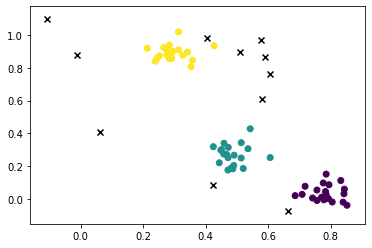

In [24]:
# Noise points plotted as black crosses; other points plotted as circles with color indicating cluster
plt.figure()
plt.scatter(X_dbscan_toy[~is_noise,0], X_dbscan_toy[~is_noise,1], c=dbscan_clustering.labels_[~is_noise], marker='o')
plt.scatter(X_dbscan_toy[is_noise,0], X_dbscan_toy[is_noise,1], c='black', marker='x')
plt.show()

### 2 (b) Effects of Data Manipulation on DBSCAN Results (3 Points)

Assume you have a $d$-dimensional dataset `X` in the Euclidean space, i.e., each data point as $d$ numerical features (with each feature value in the interval $[0, 1]$). After running DBSCAN over `X`, you get some clustering (again, we only assume it's not only noise). Now you create a new dataset `X_new` by multiplying all data points by 10 afterwards adding 100 to all data points (in Python, assuming X is a NumPy array this can simply be done by `X_new = X * 10 + 100`). Now you can run DBSCAN over `X_new`.

**Explain how you have to change the parameters of DBSCAN for `X_new` to produce equivalent output to the original results on `X`!**. You can ignore any nondeterminism (e.g. border points being assigned to different clusters, as discussed in lecture), or duplicates.

**Your Answer:**

<font color="red">
    
* The multiplication affects the absolute distances between the data points (scaling); the addition does have no effect at all (translation)
* DBSCAN works on absolute distances between data points
* We therefore need to scale epsilon the same way as the data (e.g., from 0.6 to 6) to get the same clusters and noise points
    
</font>

### 2 (c) Identifying Noise/Outliers with Clustering beyond DBSCAN (4 Points)

Apart from DBSCAN, we also covered two other important clustering algorithms: K-Means and (agglomerative) hierarchical clustering. For all three clustering algorithms we looked in detail into their approach, and also discussed the individual strengths, weaknesses, and limitations. Particularly we saw that of these three algorithms, only DBSCAN has this explicit notion of noise points. But what about K-Means and hierarchical clustering?

**Explain if K-Means and/or hierarchical clustering can potentially be utilized to identify noise/outliers in a dataset!** If your answer for an algorithm is "No", please provide a brief justification. If your answer for an algorithm is "Yes", provide a brief sketch (no pseudo code required; a basic description will do) how to use the algorithm for noise/outlier detection.

**Your Answer:**

<font color="red">
   
Both K-Means and hierarchical clustering can somewhat be used to identify noise points / outliers
* K-Means: Outliers are more likely to end in (a) their own cluster or (b) are points in clusters far away from the cluster centroid
* Hierarchical clustering: Outliers will be merged late into existing clusters; a dendrogram would visualize an outlier as a branch that connects very high up in the tree

</font>

---

# Q3: Clustering Algorithms (18 Points)

### 3 (a) Questions about K-Means (12 Points)

In the table below are 6 statements that are either True or False. Complete the table to specify whether a statement is True or False, and provide a brief explanation for your answer (Your explanation is more important than a simple True/False answer).

This is a markdown cell. Please fill in your answers for (1)~(6).

| No. | Statement                                                                                                   | True or False?       | Brief Explanation |
|-----|------------------------------------------------------------------------------------------------------------|--------------| ------- |
| (1)  | When using K-Means with K-Means++, then centroids are at all times at the position of existing data points | <font color="red">False</font> | <font color="red">The centroids are only guaranteed to match data points when initialized; this is very likely to change in the update phase</font> 
| (2)  | K-Means++ ensures that the result will not include any empty clusters. | <font color="red">False</font> | <font color="red">If the number of clusters $k$ is larger than the number of unique data points, there will be empty clusters.</font>
| (3)  | K-Means, independent of the initialization method, will always converge to a local minimum (note: the global minimum is also counted as a local minimum) | <font color="red">True</font> |  <font color="red">This is true since it states *local* minimum, as the SSE will only ever decrease or remain the same.</font>  |
| (4)  | K-Means++ will always converge to the global optimum. | <font color="red">False</font> | <font color="red">K-Means++ is still a randomized initialization method, so it's not guaranteed that an initial choice of centroids will yield the global optimum.</font>   |
| (5)  | K-Means++ initialization is more costly than a random initialization of the centroids but generally converges faster. | <font color="red">True</font> | <font color="red">K-Mean++ ensures a good "spread" of the centroids (most of the time), yielding smaller changes of the centroids in the update phase and hence less iterations.</font> |
| (6)  | K-Means is insensitive to data normalization/standardization -- that is, for the same $k$ and the same initial centroids, K-Means will yield the same clusters where the data is normalized/standardized or not. | <font color="red">False</font> | <font color="red">Normalization/Standardization can change the relative distance between data points. Hence the clusterings can differ.</font> |

### 3 (b) Interpreting Dendrograms (6 Points)

We saw in the lecture that dendrograms are a meaningful way to visualize the hierarchical relationships between the data points with respect to the clustering. Properly interpreting is important to get a correct understanding of the underlying data.

Below are the plots of 6 different datasets labeled A-F. Each dataset contains 30 data points, each with two dimensions.

<img src="data/a1-agnes-data-labeled.png">

Below are 6 dendrograms labeled 1-6. These dendograms show the clustering using **(Agglomerative) Hierarchical Clustering with Single Linkage** for the 6 datasets above, but in a random order.

<img src="data/a1-agnes-dendrogram-labeled.png">

**Find the correct combinations of datasets and dendrograms** -- that is, find for each dataset the corresponding dendrogram! Give a brief explanation for each decision and complete the table below.

**Your Answer:**

| Dataset | Dendrogram | Brief Explanation |
| ---  | ---   | ---                  |
| **A**    | <font color="red">6</font> | <font color="red">The dataset has 2 data points that can be considered outliers, which a visible as 2 data points in the dendrogram that get merged very late.</font> |
| **B**    | <font color="red">1</font> | <font color="red">This is the only dataset that show points that with increasing distance which can result into this extreme form of a dendrogram of height/depth N-1</font> |
| **C**    | <font color="red">5</font> | <font color="red">The data point in the middle can be considered an outlier w.r.t to Single Linkage, anf the dendrogram shows this as the single data points that gets merged last.</font> |
| **D**    | <font color="red">3</font> | <font color="red">This dataset has arguably two cluster w.r.t. to Single Linkage, and these to cluster can be seen in the dendrogram as these two prominent subtrees</font> |
| **E**    | <font color="red">2</font> | <font color="red">This dataset mostly looks like noise, which is best represented by a clear lack of structure in the dendrogram.</font> |
| **F**    | <font color="red">4</font> | <font color="red">This dataset has 3 pronounced cluster which are represented by the 3 noticable subtrees in the dendrogram.</font> |

---

# Q4: Association Rule Mining (12 Points)

Next, we focus on the **Apriori Algorithm for finding Frequent Itemsets**.


#### Toy Dataset

The following dataset has 5 transactions and 6 different items. The format is a list of tuples, where each tuple represents the set of items of an individual transaction. This format can also be used as input for the `efficient-apriori` package.

In [27]:
transactions_demo = [
    ('bread', 'yogurt'),
    ('bread', 'milk', 'cereal', 'eggs'),
    ('yogurt', 'milk', 'cereal', 'cheese'),
    ('bread', 'yogurt', 'milk', 'cereal'),
    ('bread', 'yogurt', 'milk', 'cheese')
]

#### Example of running the `efficient-apriori` package  (nothing for you to do here!)

We run the apriori algorithm over the demo data:

In [28]:
_, rules = apriori(transactions_demo, min_support=0.4, min_confidence=1.0)

for r in rules:
    print('Rule [{} => {}] (support: {}, confidence: {}, lift: {})'.format(r.lhs, r.rhs, r.support, r.confidence, r.lift))


Rule [('cereal',) => ('milk',)] (support: 0.6, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('bread', 'cereal') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cereal', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'yogurt') => ('milk',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese', 'milk') => ('yogurt',)] (support: 0.4, confidence: 1.0, lift: 1.25)
Rule [('cheese',) => ('milk', 'yogurt')] (support: 0.4, confidence: 1.0, lift: 1.6666666666666667)


### Recommending Movies using Association Rule Mining (ARM)

In this task, we look into using Association Rule Mining for recommending movies -- more specifically, recommending movies on physical mediums (Blu-ray, DVD, etc.), assuming that is still a thing nowadays :).

**Dataset.** We use a popular movie ratings dataset from [MovieLens](https://grouplens.org/datasets/movielens/). This dataset contains user ratings for movies (1-5 stars, incl. half stars, e.g., 3.5). Specifically, we use the [MovieLens 1M Dataset](https://grouplens.org/datasets/movielens/1m/) containing 1 Million ratings from ~6,000 users on ~4,000 movies and was released February 2003 -- so do not expect any recent Marvel movies :).

While there are more sophisticated recommendation algorithms -- and we will look into those in a later lecture -- here we focus on Association Rules. We convert this rating dataset into a transaction dataset, where a transaction represents all the movies a user has purchased. We already did this for you making the following assumption: A User has purchased all the movies s/he gave the highest rating. For example, if User A gave a highest rating of 4.5 to any movie, A has purchased all movies A rated with 4.5. This is certainly a simplifying assumption, but perfectly fine for this task here.

Let's have a quick look at the data. First, we load the ids and names of all movies into a dictionary. We need this dictionary since our transactions (i.e., the list of movies a user has bought) contains the ids and not the names of the movies. So to actually see the names of movies in the association rules, we need this way to map from a movie's id to its name.

In [ ]:
# Read file with movies (and der ids) into a pandas dataframe
df_movies = pd.read_csv('data/a1-arm-movies.csv', header=None)
# Convert dataframe to dictionary for quick lookups
movie_map = dict(zip(df_movies[0], df_movies[1]))
# Show the first 5 entries as example
for movie_id, movie_name in movie_map.items():
    print('{} -> {}'.format(movie_id, movie_name))
    if movie_id >= 5:
        break

No we can load the transactions. Again, a transaction is a user's shopping history, i.e., all the movies the user has bought. 

In [ ]:
shopping_histories = []

# Read shopping histories; each line is a comma-separated list of the movies (i.e., their ids!) a user bought
with open('data/a1-arm-movie-shopping-histories.csv') as file:
    for line in file:
        shopping_histories.append(tuple([ int(i) for i in line.strip().split(',') ]))

# Show the shopping history of the first user for an example; we need movie_map to get the name of each movie
user = 0

print('Shopping history for user {} (used for Aprior algorithm)'.format(user))
print(shopping_histories[user])
print()
print('Detailed shopping history for user {}'.format(user))
for movie_id in shopping_histories[user]:
    print('{}: {}'.format(movie_id, movie_map[movie_id]))

With the dataset loaded, we are ready to find interesting Association Rules. For performance reasons, we use the `efficient_apriori` package.

For added convenience, we provide method `show_top_rules()` which computes the Association Rules using the `efficient-apriori` package, but (a) sorts the rules w.r.t. the specified metric (default: lift), and (b) shows only the top-k rules (default: 5). The method also ensures a consistent output of each Association Rule. Each rule contains the LHS (left-hand side), RHS, as well as the support (s), confidence (c), and lift (l). Feel free to check out the code of method `show_top_rules()` in `src.utils` if anything might be unclear regarding its use.

**Run the following 4 code cells and interpret the results below!** All 4 code cells find Association Rules using the `efficient-apriori` package encapsulated in the auxiliary method `show_top_rules()` for convenience. Appreciate how Runs A-B differ with respect to the input parameter of the method calls! Also, note that we call `show_top_rules()` with `id_map=None` at first, so the results will only display the movie ids. Later, you will be asked to run the cells again with `id_map=movie_map` to see the actual names of the movies.

In [ ]:
%%time
# Run A
show_top_rules(shopping_histories, min_support=0.15, min_confidence=0.2, k=10, id_map=None)
# show_top_rules(shopping_histories, min_support=0.15, min_confidence=0.2, k=10, id_map=movie_map)

In [ ]:
%%time
# Run B
show_top_rules(shopping_histories, min_support=0.08, min_confidence=0.2, k=10, id_map=None)
# show_top_rules(shopping_histories, min_support=0.08, min_confidence=0.2, k=10, id_map=movie_map)

In [ ]:
%%time
# Run C
show_top_rules(shopping_histories, min_support=0.15, min_confidence=0.8, k=10, reverse=True, id_map=None)
# show_top_rules(shopping_histories, min_support=0.15, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

In [ ]:
%%time
# Run D
show_top_rules(shopping_histories, min_support=0.08, min_confidence=0.8, k=10, reverse=True, id_map=None)
# show_top_rules(shopping_histories, min_support=0.08, min_confidence=0.8, k=10, reverse=True, id_map=movie_map)

### 4 (a) Compare the Runs A-D and Discuss your Observations! (4 Points)

You must have noticed numerous differences between the 4 runs A-D. List at least 2 differences you have found. You may want to consider the elapsed time and the resulting association rules. Briefly explain your observations! For this subtask, you do not need to look at the movie names (`id_map=None`) as your observations are not specific to the context of movie recommendations.

**Your Answer:**

<font color='red'>
    
Possible answers (can be phrased differently):

* Lower values of `min_support` significantly increase the runtime.

* Larger values of `min_support` are more likely yield rules where the left-hand side and right-hand side contains only a single item.

* Larger values of `min_support` yield rules with larger lifts. This seems to be because the left-hand side and/or right-hand side are more likely contain more than one item. Such rules show higher lifts here.

* Choice of `min_confidence` not really that important for the runtime as the heavy lifting is done when finding Frequent Itemsets which is only determined by `min_support`

* Many subsequent rules are the same just flipped. This is because the definitions of support and lift are "symmetrical" so `S(X->Y) = S(Y->X)` and `L(X->Y) = L(Y->X)`. This does not hold for confidence, but at least here, both rules are always larger then `min_confidence`

</font>


### 4 (b) Compare the Runs A-D and discuss the results for building a recommendation engine! (4 Points)

Now run the code cells above for Runs A-B again, but this time with `id_map=movie_map` so that the output will show for each rule the actual movie names.

Comparing the results of the different runs again, but now seeing the actual movie names, should give you some further insights: particularly on (i) what you notice about the movie titles that appear on the LHS and RHS; and (ii) how the value of `min_support` affects the movies that appear. Explain the implications of your findings for building a recommendation engine.

**Your Answer:**

<font color='red'>
    
Possible answers:

* Many association rules have LHSs and RHSs containing movies of the same franchise; while not very surprising, it is an interesting observations. This makes recommending other movies of the same series/franchise generally a safe bet

* For higher values of `min_support` we mainly see rules referring to the overall most popular movies. As a consequence, we get only rules for making "mainstream" recommendations. In other words, for users with a rather unique/niche taste, we do not have suitable rules to make recommendations. Also, we are unlikely to make any recommendations beyond mainstream views. However, knowing which movie is generally popular allows to make recommendation to new users without any shopping history. Here, recommending overall popular movies is not a bad approach.

</font>

### 4 (c) Sketch a Movie Recommendation Algorithm Based on ARM (4 Points)

So far, we only looked at individual rules and how the set of rules changes for different parameter values for `min_support` and `min_confidence`. However, we still need some method like `make_recommendation(shopping_history)` that takes the shopping history of a user and returns 1 or more recommendations. You do *not* have to implement or provide code for such a method; just briefly sketch any reasonable way to do it, taking into account how to handle situations such as new users (empty shopping history); or users with long shopping history (more than the length of the left side of all our association rules).

**Your Answer:**

<font color='red'>
    
* Main idea: use the user's shopping history as the LHS, and find movies that appear as the RHS of a large number of association rules.
    
* For new users, his/her shopping history is empty. Here, recommending popular movies (high support) is a good option to fall back to.
        
* A user's shopping history can be longer than the LHSs of Association Rules. This could be handled in multiple ways: e.g., taking the user's recent history, or taking random (or all) samples of the user's shopping history.

</font>